In [1]:
# imports
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import prepare, explore

In [2]:
survey_og = pd.read_csv('survey.csv')

In [3]:
#survey_og.head()

In [4]:
'''survey_og = survey_og.rename(columns = {'Timestamp':'timestamp',
                                        'Age':'age',
                                        'Gender':'gender',
                                        'Country':'country'})'''

"survey_og = survey_og.rename(columns = {'Timestamp':'timestamp',\n                                        'Age':'age',\n                                        'Gender':'gender',\n                                        'Country':'country'})"

In [5]:
#survey_og.gender.unique()

In [6]:
'''survey_og.gender.replace(to_replace = ['M','Male','male','m','Male-ish',
                                    'maile','something kinda male?','Mal',
                                    'Male (CIS)', 'Make','Guy (-ish) ^_^',
                                    'Male ','Man','msle','Mail','cis male',
                                    'Malr','Cis Man','Cis Male',
                                    'ostensibly male, unsure what that really means'],
                                    value = 'male', inplace = True)'''

"survey_og.gender.replace(to_replace = ['M','Male','male','m','Male-ish',\n                                    'maile','something kinda male?','Mal',\n                                    'Male (CIS)', 'Make','Guy (-ish) ^_^',\n                                    'Male ','Man','msle','Mail','cis male',\n                                    'Malr','Cis Man','Cis Male',\n                                    'ostensibly male, unsure what that really means'],\n                                    value = 'male', inplace = True)"

In [7]:
#survey_og.gender.unique()

In [8]:
'''survey_og.gender.replace(to_replace = ['Female','female','Femake','Female ',
                                       'cis-female/femme','Woman','f','woman',
                                       'femail','Female (cis)','Cis Female','F'], value = 'female',
                                       inplace = True)'''

"survey_og.gender.replace(to_replace = ['Female','female','Femake','Female ',\n                                       'cis-female/femme','Woman','f','woman',\n                                       'femail','Female (cis)','Cis Female','F'], value = 'female',\n                                       inplace = True)"

In [9]:
#survey_og.gender.unique()

In [10]:
'''survey_og.gender.replace(to_replace = ['Trans-female','queer/she/they','non-binary',
                                       'Nah','All','Enby','fluid','Genderqueer',
                                       'Androgyne','Agender','male leaning androgynous',
                                       'Trans woman','Neuter','Female (trans)', 'queer',
                                       'A little about you', 'p'],  value = 'other',
                                       inplace = True)'''

"survey_og.gender.replace(to_replace = ['Trans-female','queer/she/they','non-binary',\n                                       'Nah','All','Enby','fluid','Genderqueer',\n                                       'Androgyne','Agender','male leaning androgynous',\n                                       'Trans woman','Neuter','Female (trans)', 'queer',\n                                       'A little about you', 'p'],  value = 'other',\n                                       inplace = True)"

In [11]:
#survey_og.gender.unique()

In [12]:
#survey_og.country.unique()

In [13]:
'''countries = ['United States','Canada','Mexico','Switzerland',
                                   'Germany','Ireland','Poland','Austria','Italy',
                                   'Sweden','Spain','Norway','Czech Repulbic','Denmark',
                                   'Latvia','Moldova','Georgia','Romania','Finland','Bulgaria',
                                   'France','Slovenia','Russia','Bosnia and Herzegovina']
survey_og = survey_og[survey_og['country'].isin(countries)]'''

"countries = ['United States','Canada','Mexico','Switzerland',\n                                   'Germany','Ireland','Poland','Austria','Italy',\n                                   'Sweden','Spain','Norway','Czech Repulbic','Denmark',\n                                   'Latvia','Moldova','Georgia','Romania','Finland','Bulgaria',\n                                   'France','Slovenia','Russia','Bosnia and Herzegovina']\nsurvey_og = survey_og[survey_og['country'].isin(countries)]"

In [14]:
#survey_og.groupby(by = survey_og.country).count()

In [15]:
#survey_og.work_interfere.fillna(value = 'Not applicable', inplace = True)

In [16]:
#survey_og.work_interfere.isnull().value_counts()

In [17]:
#encoded_df = survey_og

In [18]:
#encoded_df.gender = survey_og.gender.map({'male':0,'female':1,'other':2})

In [19]:
#encoded_df.work_interfere = encoded_df.work_interfere.map({'Never':0,'Not Applicable':0, 'Rarely':1,'Sometimes':1,'Often':1})

In [20]:
#encoded_df.care_options = encoded_df.care_options.map({'No':0,'Yes':1,'Not sure':2})

In [21]:
#encoded_df.leave = encoded_df.leave.map({'Very difficult':0, 'Somewhat difficult':1, 'Don\'t know':2, 'Somewhat easy':3, 'Very easy':4})

In [22]:
#encoded_df.coworkers = encoded_df.coworkers.map({'No':0, 'Yes':1, 'Some of them':2})

In [23]:
#encoded_df.supervisor = encoded_df.supervisor.map({'No':0, 'Yes':1, 'Some of Them':2})

In [24]:
#encoded_df

In [25]:
#import parker_prep

In [26]:
#survey_og.head().T

In [27]:
#survey_og.self_employed.value_counts()

In [28]:
#survey_og.self_employed = survey_og.self_employed.fillna('No')

In [29]:
#survey_og.self_employed.isnull().value_counts()

In [30]:
"""for x in list(survey_og.columns):
    print(survey_og[x].isnull().value_counts())"""

'for x in list(survey_og.columns):\n    print(survey_og[x].isnull().value_counts())'

In [31]:
#survey_og.treatment.value_counts()

In [32]:
#survey_og.columns

In [33]:
#survey_og = survey_og.drop(columns = ['timestamp','country','state','comments'])

In [34]:
#survey_og.coworkers.isnull().unique()

In [35]:
#survey_og.obs_consequence.isnull().value_counts()

In [36]:
'''def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final'''

'def remove_outlier_IQR(df):\n    Q1=df.quantile(0.25)\n    Q3=df.quantile(0.75)\n    IQR=Q3-Q1\n    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]\n    return df_final'

In [37]:
#survey_og['age'] = remove_outlier_IQR(survey_og['age'])

In [38]:
#survey_og.columns

In [39]:
#survey_og.obs_consequence.isnull().value_counts()

In [40]:
survey_og = prepare.prep_the_strings(survey_og)

In [41]:
survey_og.shape

(957, 25)

In [42]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    prcnt_miss = num_missing / rows * 100
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'percent_rows_missing': prcnt_miss})
    return cols_missing
def nulls_by_row(df):
    num_missing = df.isnull().sum(axis=1)
    prcnt_miss = num_missing / df.shape[1] * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': prcnt_miss})\
    .reset_index()\
    .groupby(['num_cols_missing', 'percent_cols_missing']).count()\
    .rename(index=str, columns={'index': 'num_rows'}).reset_index()
    return rows_missing

In [43]:
nulls_by_col(survey_og)

,num_rows_missing,percent_rows_missing
timestamp,0,0.0
age,0,0.0
gender,0,0.0
country,0,0.0
self_employed,0,0.0
family_history,0,0.0
treatment,0,0.0
work_interfere,0,0.0
no_employees,0,0.0
remote_work,0,0.0


In [44]:
survey_og = survey_og.drop(columns = ['country','timestamp'] )

In [45]:
survey_og.work_interfere = survey_og.work_interfere.map({'Never':0,'Not applicable':0, 'Rarely':1,'Sometimes':1,'Often':1})

In [46]:
survey_og.work_interfere.value_counts()

1    604
0    353
Name: work_interfere, dtype: int64

In [48]:
train, validate, test = explore.three_split(survey_og, 'work_interfere')

In [49]:
cat_vars = train.drop(columns = ['age'])

In [50]:
quant_vars = pd.DataFrame(train['age'])

In [51]:
cat_vars

,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
973,male,No,Yes,No,0,More than 1000,No,Yes,Yes,Yes,...,Yes,Don't know,No,No,Yes,Yes,No,No,Yes,No
1022,male,No,No,No,0,6-25,No,Yes,Yes,Yes,...,Don't know,Somewhat easy,No,No,Yes,Yes,No,Maybe,Yes,No
358,male,No,No,Yes,1,100-500,Yes,Yes,No,No,...,Don't know,Somewhat easy,Yes,Yes,Some of them,Some of them,No,Maybe,Don't know,No
278,male,No,No,Yes,1,100-500,No,No,Yes,Yes,...,Don't know,Very easy,Maybe,No,Some of them,Some of them,No,No,Yes,No
399,male,No,No,Yes,1,100-500,No,Yes,Don't know,Not sure,...,Yes,Somewhat easy,Maybe,No,Some of them,Some of them,No,Maybe,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,female,No,Yes,No,0,500-1000,No,No,No,No,...,No,Very difficult,Yes,Maybe,No,No,No,Maybe,No,Yes
515,male,No,No,No,0,6-25,Yes,Yes,Don't know,No,...,Don't know,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No
26,male,No,No,No,0,1-5,No,Yes,Don't know,Not sure,...,Don't know,Don't know,Maybe,Maybe,Some of them,No,No,No,Don't know,No
1094,male,No,No,Yes,1,100-500,No,Yes,Yes,No,...,Yes,Very easy,No,No,No,Yes,No,No,Yes,No


<AxesSubplot:xlabel='work_interfere', ylabel='count'>

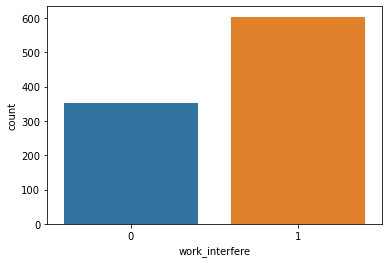

In [52]:
sns.countplot(survey_og.work_interfere)

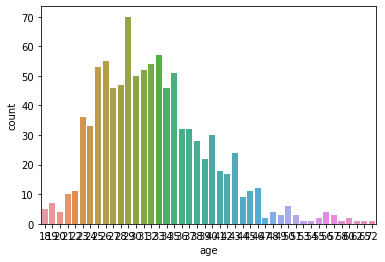

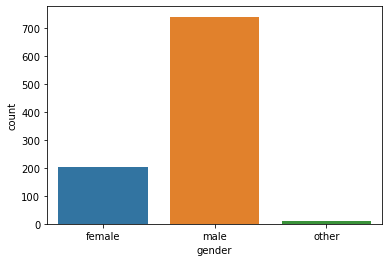

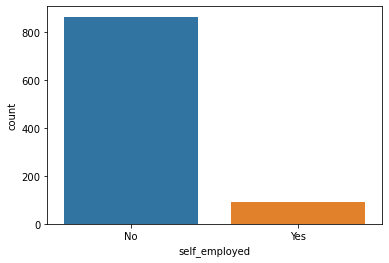

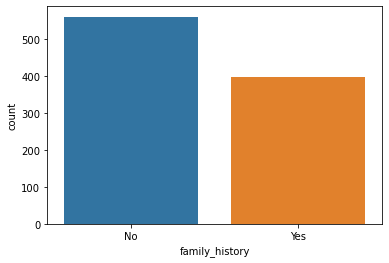

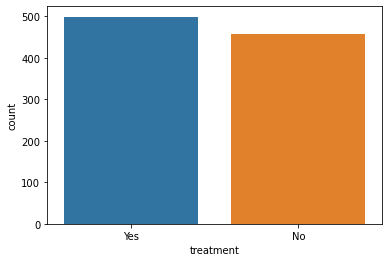

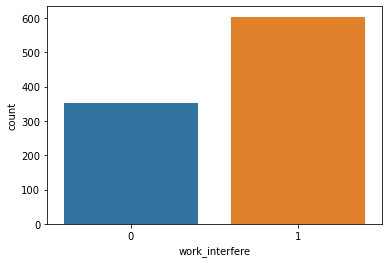

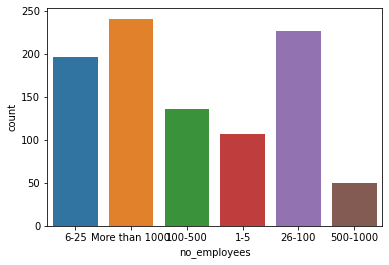

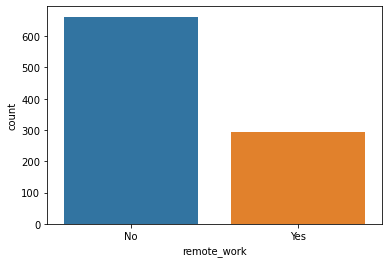

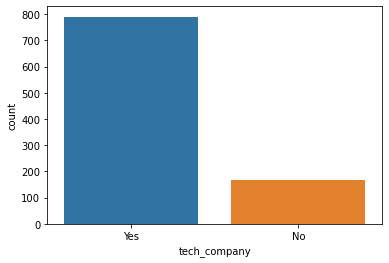

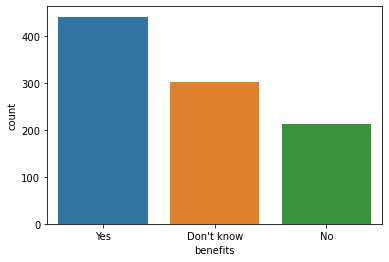

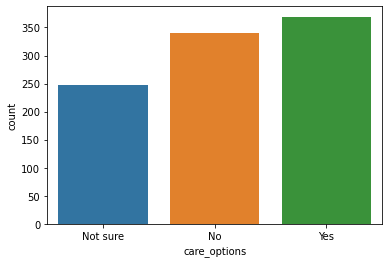

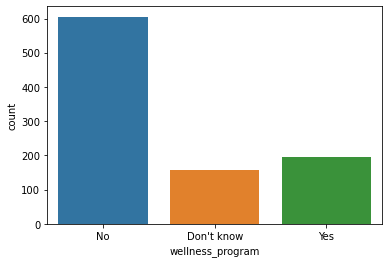

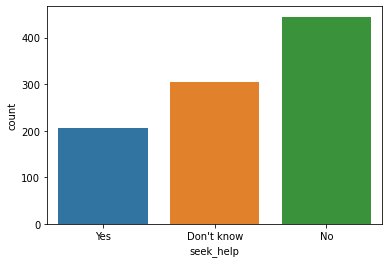

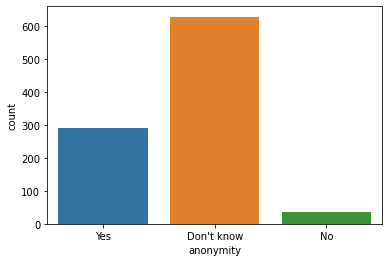

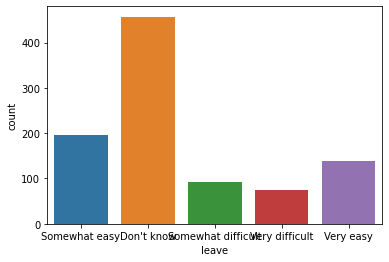

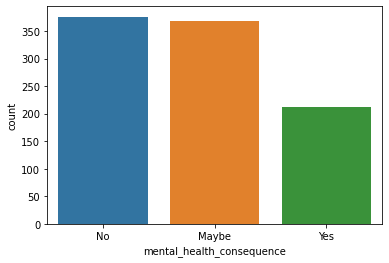

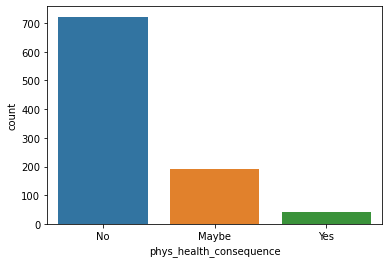

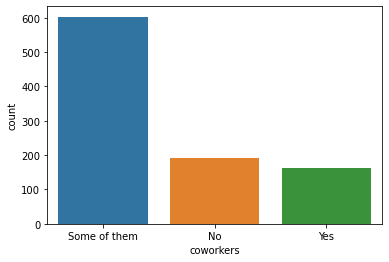

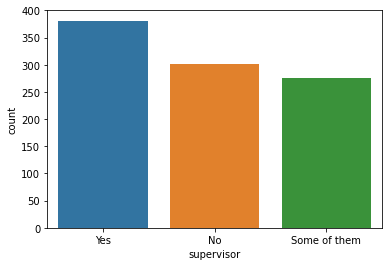

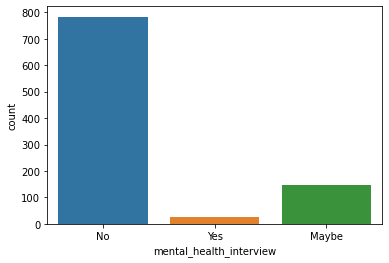

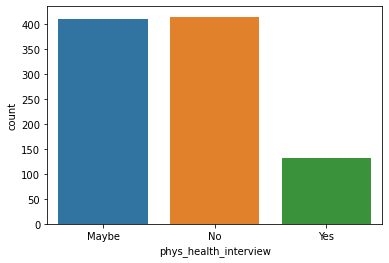

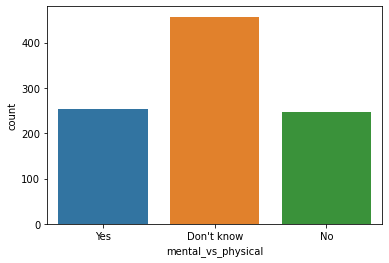

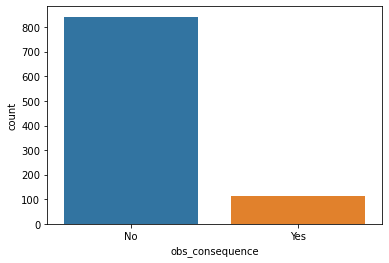

In [53]:
for x in train.columns:
    sns.countplot(survey_og[x])
    plt.show()

## Bivariate Exploration 

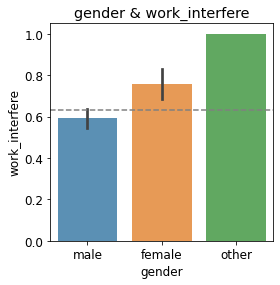


_____________________



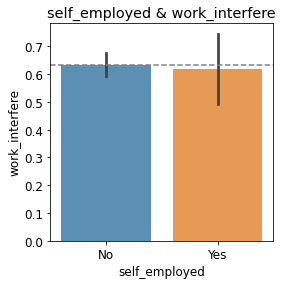


_____________________



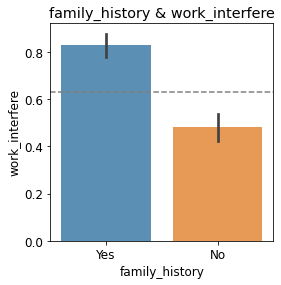


_____________________



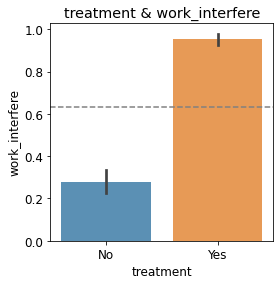


_____________________



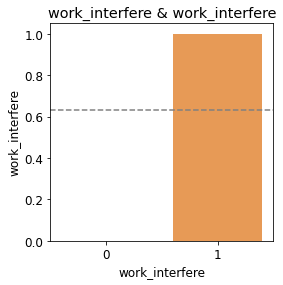


_____________________



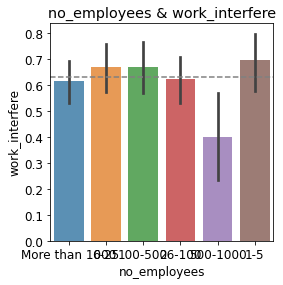


_____________________



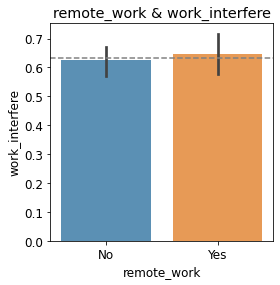


_____________________



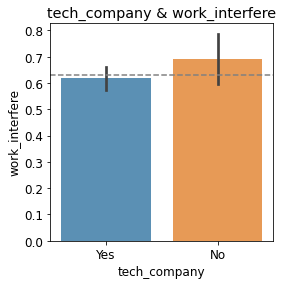


_____________________



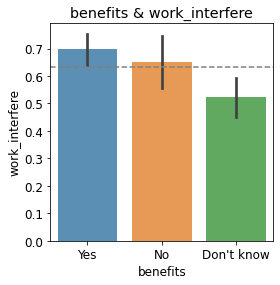


_____________________



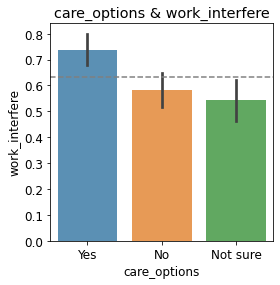


_____________________



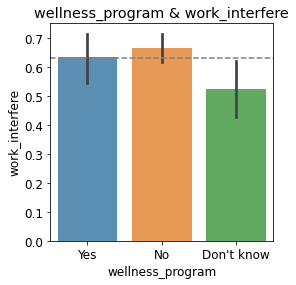


_____________________



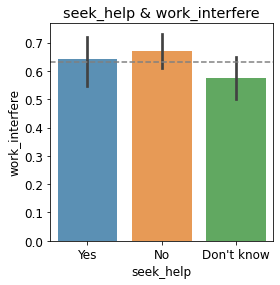


_____________________



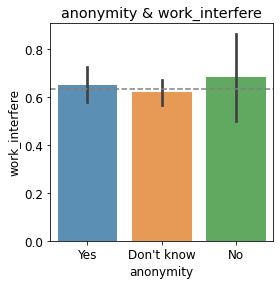


_____________________



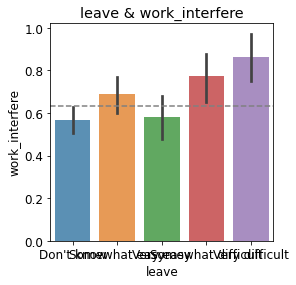


_____________________



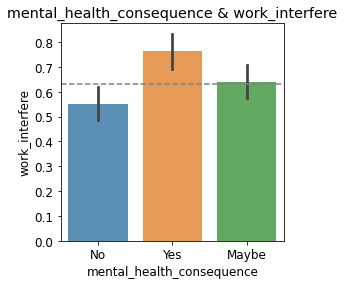


_____________________



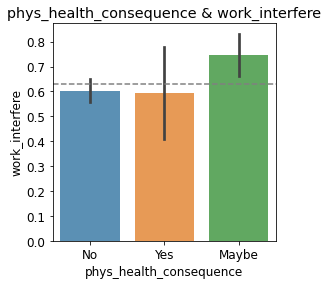


_____________________



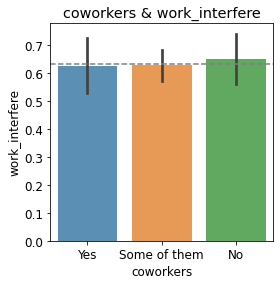


_____________________



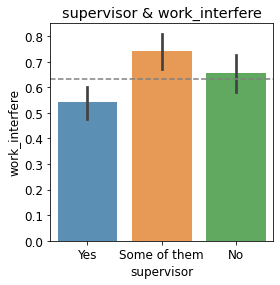


_____________________



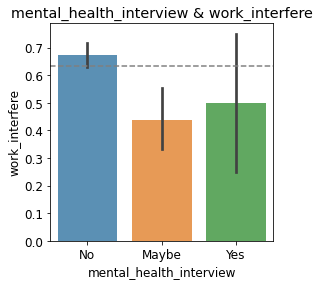


_____________________



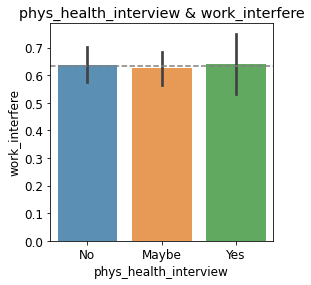


_____________________



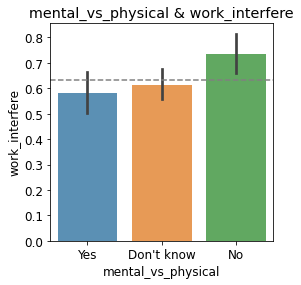


_____________________



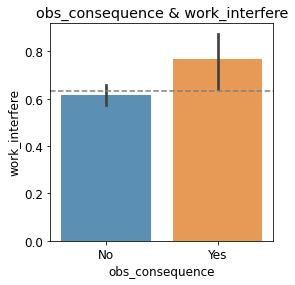


_____________________

age


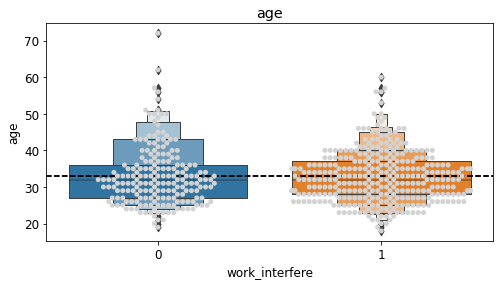

                count       mean       std   min   25%   50%   75%   max
work_interfere                                                          
0               197.0  33.025381  8.191233  19.0  27.0  32.0  36.0  72.0
1               338.0  32.801775  7.049574  18.0  28.0  32.0  37.0  60.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=32599.5, pvalue=0.6874668645912754)

____________________

                     variable    chi2  p-value  degrees of freedom
0              family_history   65.94   0.0000                 1.0
1                   treatment  258.60   0.0000                 1.0
2              work_interfere  530.71   0.0000                 1.0
3     mental_health_interview   18.51   0.0001                 2.0
4                care_options   16.16   0.0003                 2.0
5                  supervisor   15.60   0.0004                 2.0
6   mental_health_consequence   15.41   0.0005                 2.0
7                       leave   19.49   0.0006               

,variable,chi2,p-value,degrees of freedom
0,family_history,65.94,0.0000,1.0
1,treatment,258.60,0.0000,1.0
2,work_interfere,530.71,0.0000,1.0
3,mental_health_interview,18.51,0.0001,2.0
4,care_options,16.16,0.0003,2.0
5,supervisor,15.60,0.0004,2.0
6,mental_health_consequence,15.41,0.0005,2.0
7,leave,19.49,0.0006,4.0
8,benefits,13.58,0.0011,2.0
9,gender,13.21,0.0014,2.0


In [55]:
explore.mental_health_bivariate(train, 'work_interfere', cat_vars, quant_vars)

### Bivariate Takeaways
    - Significant relationships: *** What do these numbers represent? ***
        - Gender: .0005
        - Family history: 5.3e-16
        - Benefits: .052 (more investigation)
        - Care options: .001
        - Wellness program: .01
        - Seek help: .01
        - Anonymity: .037
        - Leave: .0077
        - mental_health_consequences: .0035
        - supervisor : .013
        - mental health: .016
        - mental_vs_physical: .01
        - obs_consequences: .019
    - Some of the values have a "dont know" column and they all are much less than yes or no. My theory is this is because people who need to access help or resources to get help probably looked into it because it was impacting work performance. 
        - companies larger than 1000 employees seem to have the least amount of impacts to work compared to the other sized companies
        - people who feel like their employer does not consider mental health to be similar to physical health report higher rates of impact to work. 
        - Feeling comfortable talking to a supervisor also reduces the impact to work performance
        - percieving that one would be punished for mental health also had a higher rate of impact to work performance
        - observing negative consequences to others in the company hurts work performance
        - the easier it is to get leave the less impact to work performacne there is

In [56]:
survey_og.columns

Index(['age', 'gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [57]:

'''cat1 = survey_og[['gender', 'self_employed', 'family_history']]
cat2 = survey_og[['treatment', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options']]
cat3 = survey_og[['wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence']]
cat4 = survey_og[['coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']]'''

In [60]:
#explore.mental_health_multivariate(train, 'work_interfere', list(cat1.columns), quant_vars.columns)

AttributeError: module 'explore' has no attribute 'mental_health_multivariate'

In [59]:
#explore.explore_multivariate(train, 'work_interfere', list(cat2.columns), quant_vars.columns)

AttributeError: module 'explore' has no attribute 'explore_multivariate'

In [ ]:
#explore.explore_multivariate(train, 'work_interfere', list(cat3.columns), quant_vars.columns)#

In [ ]:
#tyler_explore.explore_multivariate(train, 'work_interfere', list(cat3.columns), quant_vars.columns)

In [ ]:
#tyler_explore.explore_multivariate(train, 'work_interfere', list(cat4.columns), quant_vars.columns)

In [61]:
from imblearn import over_sampling
from sklearn import preprocessing
from explore import full_split
import prepare

In [62]:
survey_og.head()

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,No,No,Yes,1,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,No,No,No,1,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,No,No,No,1,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
4,31,male,No,No,No,0,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33,male,No,Yes,No,1,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No


In [63]:
encode = prepare.prep_encode(survey_og)

In [64]:
encode.head()

,age,gender,self_employed,family_history,treatment,work_interfere,company_size,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,1,0,0,1,NaN,1,0,1,1,...,1,3,0,0,2,1,0,2,1,0
1,44,0,0,0,0,NaN,5,0,0,2,...,2,2,2,0,0,0,0,0,2,0
2,32,0,0,0,0,NaN,1,0,1,0,...,2,1,0,0,1,1,1,1,0,0
4,31,0,0,0,0,NaN,3,1,1,1,...,2,2,0,0,2,1,1,1,2,0
5,33,0,0,1,0,NaN,1,0,1,1,...,2,2,0,0,1,1,0,2,2,0


In [65]:
survey_og.work_interfere

0       1
1       1
2       1
4       0
5       1
       ..
1253    1
1255    1
1256    1
1257    0
1258    1
Name: work_interfere, Length: 957, dtype: int64

In [ ]:
encode

In [66]:
encode.work_interfere = survey_og.work_interfere

In [ ]:
#X_train, y_train, X_validate, y_validate, X_test, y_test = full_split(encode, 'work_interfere')

In [ ]:
#sns.countplot(y_train)

In [ ]:
#X_train

## Modeling

In [67]:
encode['baseline'] = 1
baseline_accuracy = (encode.baseline == encode.work_interfere).mean()
print(f'Baseline accuracy is {baseline_accuracy:.2%}')

Baseline accuracy is 63.11%


In [ ]:
#X_res, y_res = ros.fit_resample(X_train, y_train)

In [ ]:
#X_res.shape

In [ ]:
#sns.countplot(y_res)

In [ ]:
#X_res

### Now we have a balanced dataset, Next up lets dummy encode the features for the models

In [68]:
from sklearn.preprocessing import OneHotEncoder

In [164]:
# encode the top 9 variables as decided by p value with chi2 with degrees of freedom >1
dum_df = pd.get_dummies(data = encode, columns = ['mental_health_interview','care_options','supervisor',
                                'mental_health_consequence','leave', 'benefits','gender'], drop_first = True)

In [165]:
dum_df.columns

Index(['age', 'self_employed', 'family_history', 'treatment', 'work_interfere',
       'company_size', 'remote_work', 'tech_company', 'wellness_program',
       'seek_help', 'anonymity', 'phys_health_consequence', 'coworkers',
       'phys_health_interview', 'mental_vs_physical', 'obs_consequence',
       'baseline', 'mental_health_interview_1', 'mental_health_interview_2',
       'care_options_1', 'care_options_2', 'supervisor_1', 'supervisor_2',
       'mental_health_consequence_1', 'mental_health_consequence_2', 'leave_1',
       'leave_2', 'leave_3', 'leave_4', 'benefits_1', 'benefits_2', 'gender_1',
       'gender_2'],
      dtype='object')

In [166]:
# drop the unecessary columns
dum_df = dum_df.drop(columns = ['age', 'self_employed', 'company_size', 'remote_work', 
                               'tech_company', 'wellness_program','seek_help', 
                               'anonymity', 'phys_health_consequence', 'coworkers',
                               'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'baseline'])

In [202]:
dum_df.columns

Index(['work_interfere', 'mental_health_interview_2', 'care_options_1',
       'supervisor_1', 'benefits_2', 'mental_health_consequence_1', 'gender_1',
       'supervisor_2', 'leave_2', 'benefits_1', 'phys_health_consequence_2',
       'company_size_4', 'wellness_program_2', 'care_options_2', 'leave_1',
       'seek_help_2'],
      dtype='object')

### Simple runthrough and cross validation

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import explore, evaluate
from sklearn.model_selection import GridSearchCV

In [168]:
ros = over_sampling.RandomOverSampler(random_state = 123)

In [169]:
X_train, y_train, X_validate, y_validate, X_test, y_test = explore.full_split(dum_df, 'work_interfere')

In [170]:
X_res, y_res = ros.fit_resample(X_train, y_train)

In [171]:
X_res.shape

(676, 18)

In [172]:
X_res.head(20)

,family_history,treatment,mental_health_interview_1,mental_health_interview_2,care_options_1,care_options_2,supervisor_1,supervisor_2,mental_health_consequence_1,mental_health_consequence_2,leave_1,leave_2,leave_3,leave_4,benefits_1,benefits_2,gender_1,gender_2
0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0
2,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
3,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0
4,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0
5,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0
6,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0
7,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
9,1,1,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0


<AxesSubplot:xlabel='work_interfere', ylabel='count'>

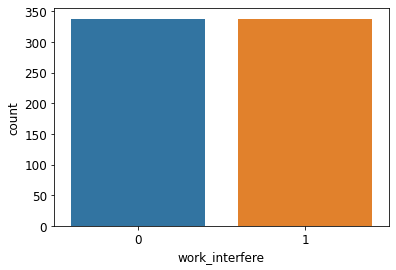

In [173]:
sns.countplot(y_res)

#### RFC

In [174]:
rfc = RandomForestClassifier(random_state = 123)

In [175]:
rfc.fit(X_res, y_res)

RandomForestClassifier(random_state=123)

In [176]:
y_res.value_counts()

1    338
0    338
Name: work_interfere, dtype: int64

In [177]:
evaluate.run_metrics(X_res, y_res, rfc, 'Train' )

Train data set accuracy score: 96.89%
Train data set precision score 98.18%
Train data set recall score: 95.56%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       338
           1       0.98      0.96      0.97       338

    accuracy                           0.97       676
   macro avg       0.97      0.97      0.97       676
weighted avg       0.97      0.97      0.97       676

-------------------------------

confusion matrix
[[332   6]
 [ 15 323]]

Train data set model metrics
---------------------------------
True positive rate for the model is 95.56%
False positive rate for the model is  1.78%
True negative rate for the model is 98.22%
False negative rate for the model is 4.44%



In [178]:
evaluate.run_metrics(X_validate, y_validate, rfc, 'validate' )

validate data set accuracy score: 78.70%
validate data set precision score 84.29%
validate data set recall score: 81.38%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        85
           1       0.84      0.81      0.83       145

    accuracy                           0.79       230
   macro avg       0.77      0.78      0.77       230
weighted avg       0.79      0.79      0.79       230

-------------------------------

confusion matrix
[[ 63  22]
 [ 27 118]]

validate data set model metrics
---------------------------------
True positive rate for the model is 81.38%
False positive rate for the model is  25.88%
True negative rate for the model is 74.12%
False negative rate for the model is 18.62%



In [85]:
RandomForestClassifier()

RandomForestClassifier()

In [86]:
param = {
    'criterion': ['gini','entropy'], 
    'max_depth': [ 8,10,12,14,16],
    'min_samples_split': [ 8, 10, 12, 15],  
    'min_samples_leaf': [ 3, 4, 5, 6, 8],
    'ccp_alpha':[0.0, 0.1, .2, .3,.4]} 

In [87]:
grid3 = GridSearchCV(rfc,
                    param, n_jobs=4,
                    cv=5)

grid3.fit(X_res, y_res)

KeyboardInterrupt: 

In [ ]:
grid3.best_estimator_

#### Decision tree time

In [88]:
tree = DecisionTreeClassifier()

In [179]:
tree.fit(X_res,y_res)

DecisionTreeClassifier()

In [180]:
evaluate.run_metrics(X_res, y_res, tree, 'Train')

Train data set accuracy score: 96.89%
Train data set precision score 99.07%
Train data set recall score: 94.67%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       338
           1       0.99      0.95      0.97       338

    accuracy                           0.97       676
   macro avg       0.97      0.97      0.97       676
weighted avg       0.97      0.97      0.97       676

-------------------------------

confusion matrix
[[335   3]
 [ 18 320]]

Train data set model metrics
---------------------------------
True positive rate for the model is 94.67%
False positive rate for the model is  0.89%
True negative rate for the model is 99.11%
False negative rate for the model is 5.33%



In [181]:
evaluate.run_metrics(X_validate, y_validate, tree, 'validate')

validate data set accuracy score: 76.09%
validate data set precision score 83.58%
validate data set recall score: 77.24%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.66      0.74      0.70        85
           1       0.84      0.77      0.80       145

    accuracy                           0.76       230
   macro avg       0.75      0.76      0.75       230
weighted avg       0.77      0.76      0.76       230

-------------------------------

confusion matrix
[[ 63  22]
 [ 33 112]]

validate data set model metrics
---------------------------------
True positive rate for the model is 77.24%
False positive rate for the model is  25.88%
True negative rate for the model is 74.12%
False negative rate for the model is 22.76%



In [92]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [93]:
tree.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [94]:
param = {
    'criterion': ['gini','entropy'], 
    'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
    'min_samples_split': [ 3, 4, 5, 6, 8, 10, 12, 15],  
    'min_samples_leaf': [ 3, 4, 5, 6, 8, 10, 12, 15],
    'ccp_alpha':[0.0, 0.1, .2, .3,.4]} 

In [95]:
grid2 = GridSearchCV(tree,
                    param, n_jobs=-1,
                    cv=5)

grid2.fit(X_res, y_res)

KeyboardInterrupt: 

In [ ]:
grid2.best_estimator_

#### Lets try XGBOOOOOOST! 

In [96]:
import xgboost as xgb

In [97]:
D_train = xgb.DMatrix(X_res, label = y_res)
D_validate = xgb.DMatrix(X_validate, label = y_validate )
D_test = xgb.DMatrix(X_test, label = y_test)


In [98]:
D_train

In [99]:
param = {
    'eta': 0.3, 
    'max_depth': 5,  
    'objective': 'multi:softprob',  
    'num_class': 2,
    } 
steps = 50

In [100]:
boost = xgb.train(param, D_train, steps)

[09:26:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [101]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

In [102]:
preds = boost.predict(D_train)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_res, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_res, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_res, best_preds)))

Precision = 0.9469917313251848
Recall = 0.9452662721893491
Accuracy = 0.9452662721893491


In [103]:
preds = boost.predict(D_validate)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_validate, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_validate, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_validate, best_preds)))

Precision = 0.772215269086358
Recall = 0.7823529411764706
Accuracy = 0.7869565217391304


In [104]:
def run_xgboost_metrics(data, target):
    preds = boost.predict(data)
    best_preds = np.asarray([np.argmax(line) for line in preds])
    print("Precision = {}".format(precision_score(target, best_preds, average='macro'))),
    print("Recall = {}".format(recall_score(target, best_preds, average='macro'))),
    print("Accuracy = {}".format(accuracy_score(target, best_preds)))
    return preds

In [105]:
preds = run_xgboost_metrics(D_train, y_res)

Precision = 0.9469917313251848
Recall = 0.9452662721893491
Accuracy = 0.9452662721893491


In [ ]:
boost.dump_model('dump.raw.txt')

In [ ]:
xgbboost = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(xgbboost,
                    parameters, n_jobs=-1,
                    cv=3)

grid.fit(X_res, y_res)

In [ ]:
grid.best_estimator_

#### Multi-layer Perceptron (sounds like a transformer name)

In [106]:
from sklearn.neural_network import MLPClassifier

In [107]:
mlp = MLPClassifier(random_state=123, max_iter=300).fit(X_res, y_res)

In [108]:
evaluate.run_metrics(X_res, y_res, mlp, 'train')

train data set accuracy score: 91.57%
train data set precision score 94.89%
train data set recall score: 87.87%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       338
           1       0.95      0.88      0.91       338

    accuracy                           0.92       676
   macro avg       0.92      0.92      0.92       676
weighted avg       0.92      0.92      0.92       676

-------------------------------

confusion matrix
[[322  16]
 [ 41 297]]

train data set model metrics
---------------------------------
True positive rate for the model is 87.87%
False positive rate for the model is  4.73%
True negative rate for the model is 95.27%
False negative rate for the model is 12.13%



In [109]:
evaluate.run_metrics(X_validate, y_validate, mlp, 'Validate')

Validate data set accuracy score: 82.17%
Validate data set precision score 88.81%
Validate data set recall score: 82.07%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.73      0.82      0.77        85
           1       0.89      0.82      0.85       145

    accuracy                           0.82       230
   macro avg       0.81      0.82      0.81       230
weighted avg       0.83      0.82      0.82       230

-------------------------------

confusion matrix
[[ 70  15]
 [ 26 119]]

Validate data set model metrics
---------------------------------
True positive rate for the model is 82.07%
False positive rate for the model is  17.65%
True negative rate for the model is 82.35%
False negative rate for the model is 17.93%



In [ ]:
parameters = {
    'hidden_layer_sizes': [(20,),(50,),(100,)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05, .025, .01, .005],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
grid1 = GridSearchCV(mlp, parameters, n_jobs=-1, cv=5)
grid1.fit(X_res, y_res)

In [ ]:
grid1.best_estimator_

In [ ]:
grid1.best_params_

### Model Re-run with cross validated hyperparams

#### Random forest

In [110]:
rfc = RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=10,
                       random_state=123)

In [111]:
rfc.fit(X_res, y_res)

RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=10,
                       random_state=123)

In [112]:
evaluate.run_metrics(X_res, y_res, rfc, 'train')

train data set accuracy score: 88.91%
train data set precision score 94.88%
train data set recall score: 82.25%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       338
           1       0.95      0.82      0.88       338

    accuracy                           0.89       676
   macro avg       0.90      0.89      0.89       676
weighted avg       0.90      0.89      0.89       676

-------------------------------

confusion matrix
[[323  15]
 [ 60 278]]

train data set model metrics
---------------------------------
True positive rate for the model is 82.25%
False positive rate for the model is  4.44%
True negative rate for the model is 95.56%
False negative rate for the model is 17.75%



In [113]:
evaluate.run_metrics(X_validate, y_validate, rfc, 'validate')

validate data set accuracy score: 83.04%
validate data set precision score 94.17%
validate data set recall score: 77.93%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        85
           1       0.94      0.78      0.85       145

    accuracy                           0.83       230
   macro avg       0.83      0.85      0.83       230
weighted avg       0.86      0.83      0.83       230

-------------------------------

confusion matrix
[[ 78   7]
 [ 32 113]]

validate data set model metrics
---------------------------------
True positive rate for the model is 77.93%
False positive rate for the model is  8.24%
True negative rate for the model is 91.76%
False negative rate for the model is 22.07%



#### Decision Tree

In [114]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=3)

In [115]:
tree.fit(X_res,y_res)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=3)

In [116]:
evaluate.run_metrics(X_res, y_res, tree, 'train')

train data set accuracy score: 86.98%
train data set precision score 94.01%
train data set recall score: 78.99%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       338
           1       0.94      0.79      0.86       338

    accuracy                           0.87       676
   macro avg       0.88      0.87      0.87       676
weighted avg       0.88      0.87      0.87       676

-------------------------------

confusion matrix
[[321  17]
 [ 71 267]]

train data set model metrics
---------------------------------
True positive rate for the model is 78.99%
False positive rate for the model is  5.03%
True negative rate for the model is 94.97%
False negative rate for the model is 21.01%



In [117]:
evaluate.run_metrics(X_validate, y_validate, tree, 'train')

train data set accuracy score: 82.17%
train data set precision score 94.83%
train data set recall score: 75.86%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.69      0.93      0.79        85
           1       0.95      0.76      0.84       145

    accuracy                           0.82       230
   macro avg       0.82      0.84      0.82       230
weighted avg       0.85      0.82      0.82       230

-------------------------------

confusion matrix
[[ 79   6]
 [ 35 110]]

train data set model metrics
---------------------------------
True positive rate for the model is 75.86%
False positive rate for the model is  7.06%
True negative rate for the model is 92.94%
False negative rate for the model is 24.14%



#### XGBOOST

In [118]:
xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.25, gamma=0.1,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [119]:
xgbc.fit(X_res, y_res)

[09:27:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.25, gamma=0.1,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [120]:
evaluate.run_metrics(X_res,y_res,xgbc, 'train')

train data set accuracy score: 92.01%
train data set precision score 94.38%
train data set recall score: 89.35%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       338
           1       0.94      0.89      0.92       338

    accuracy                           0.92       676
   macro avg       0.92      0.92      0.92       676
weighted avg       0.92      0.92      0.92       676

-------------------------------

confusion matrix
[[320  18]
 [ 36 302]]

train data set model metrics
---------------------------------
True positive rate for the model is 89.35%
False positive rate for the model is  5.33%
True negative rate for the model is 94.67%
False negative rate for the model is 10.65%



In [121]:
evaluate.run_metrics(X_validate, y_validate, xgbc, 'validate')

validate data set accuracy score: 80.87%
validate data set precision score 87.97%
validate data set recall score: 80.69%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        85
           1       0.88      0.81      0.84       145

    accuracy                           0.81       230
   macro avg       0.80      0.81      0.80       230
weighted avg       0.82      0.81      0.81       230

-------------------------------

confusion matrix
[[ 69  16]
 [ 28 117]]

validate data set model metrics
---------------------------------
True positive rate for the model is 80.69%
False positive rate for the model is  18.82%
True negative rate for the model is 81.18%
False negative rate for the model is 19.31%



#### MLP

In [122]:
mlp = MLPClassifier(alpha=0.025, hidden_layer_sizes=(50,), max_iter=300,
              random_state=123).fit(X_res, y_res)

In [123]:
evaluate.run_metrics(X_res, y_res, mlp, 'train')

train data set accuracy score: 90.53%
train data set precision score 95.07%
train data set recall score: 85.50%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       338
           1       0.95      0.86      0.90       338

    accuracy                           0.91       676
   macro avg       0.91      0.91      0.91       676
weighted avg       0.91      0.91      0.91       676

-------------------------------

confusion matrix
[[323  15]
 [ 49 289]]

train data set model metrics
---------------------------------
True positive rate for the model is 85.50%
False positive rate for the model is  4.44%
True negative rate for the model is 95.56%
False negative rate for the model is 14.50%



In [124]:
evaluate.run_metrics(X_validate, y_validate, mlp, 'validate')

validate data set accuracy score: 83.48%
validate data set precision score 92.13%
validate data set recall score: 80.69%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        85
           1       0.92      0.81      0.86       145

    accuracy                           0.83       230
   macro avg       0.82      0.84      0.83       230
weighted avg       0.85      0.83      0.84       230

-------------------------------

confusion matrix
[[ 75  10]
 [ 28 117]]

validate data set model metrics
---------------------------------
True positive rate for the model is 80.69%
False positive rate for the model is  11.76%
True negative rate for the model is 88.24%
False negative rate for the model is 19.31%



### Re-run again with just significant columns

In [125]:
list_ = ['mental_health_interview_0',
 'mental_health_interview_2',
 'care_options_1',
 'supervisor_1',
 'benefits_2',
 'gender_0',
 'mental_health_consequence_1',
 'gender_1',
 'mental_health_consequence_0',
 'supervisor_2',
 'leave_2',
 'benefits_1',
 'leave_0',
 'phys_health_consequence_2',
 'mental_vs_physical_0',
 'company_size_4',
 'wellness_program_2',
 'care_options_2',
 'phys_health_consequence_0',
 'leave_1',
 'wellness_program_0',
 'seek_help_2',
 'care_options_0']

In [126]:
encode.columns

Index(['age', 'gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'company_size', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'baseline'],
      dtype='object')

In [139]:
encode.obs_consequence.value_counts()

0    842
1    115
Name: obs_consequence, dtype: int64

In [140]:
dum_df = pd.get_dummies(data = encode, columns = ['gender', 'self_employed',
                                                   'company_size', 'remote_work',
                                                   'benefits', 'care_options', 'wellness_program', 'seek_help',
                                                   'anonymity', 'leave', 'mental_health_consequence',
                                                   'phys_health_consequence', 'coworkers', 'supervisor',
                                                   'mental_health_interview', 'phys_health_interview',
                                                   'mental_vs_physical'], drop_first = False)

In [143]:
dum_df = dum_df[list_]

In [144]:
X_train, y_train, X_validate, y_validate, X_test, y_test = explore.full_split(dum_df, 'work_interfere')

In [145]:
X_res, y_res = ros.fit_resample(X_train, y_train)

#### RFC

In [148]:
rfc = RandomForestClassifier(random_state = 123).fit(X_res, y_res)

In [149]:
evaluate.run_metrics(X_res, y_res, rfc, 'train')

train data set accuracy score: 93.64%
train data set precision score 97.12%
train data set recall score: 89.94%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       338
           1       0.97      0.90      0.93       338

    accuracy                           0.94       676
   macro avg       0.94      0.94      0.94       676
weighted avg       0.94      0.94      0.94       676

-------------------------------

confusion matrix
[[329   9]
 [ 34 304]]

train data set model metrics
---------------------------------
True positive rate for the model is 89.94%
False positive rate for the model is  2.66%
True negative rate for the model is 97.34%
False negative rate for the model is 10.06%



In [150]:
evaluate.run_metrics(X_validate, y_validate, rfc, 'train')

train data set accuracy score: 64.35%
train data set precision score 71.43%
train data set recall score: 72.41%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.52      0.51      0.51        85
           1       0.71      0.72      0.72       145

    accuracy                           0.64       230
   macro avg       0.62      0.62      0.62       230
weighted avg       0.64      0.64      0.64       230

-------------------------------

confusion matrix
[[ 43  42]
 [ 40 105]]

train data set model metrics
---------------------------------
True positive rate for the model is 72.41%
False positive rate for the model is  49.41%
True negative rate for the model is 50.59%
False negative rate for the model is 27.59%



#### Tree

In [151]:
tree = DecisionTreeClassifier().fit(X_res, y_res)

In [152]:
evaluate.run_metrics(X_res, y_res, tree, 'train')

train data set accuracy score: 93.64%
train data set precision score 98.36%
train data set recall score: 88.76%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       338
           1       0.98      0.89      0.93       338

    accuracy                           0.94       676
   macro avg       0.94      0.94      0.94       676
weighted avg       0.94      0.94      0.94       676

-------------------------------

confusion matrix
[[333   5]
 [ 38 300]]

train data set model metrics
---------------------------------
True positive rate for the model is 88.76%
False positive rate for the model is  1.48%
True negative rate for the model is 98.52%
False negative rate for the model is 11.24%



In [154]:
evaluate.run_metrics(X_validate, y_validate, tree, 'train')

train data set accuracy score: 55.22%
train data set precision score 66.94%
train data set recall score: 57.24%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.42      0.52      0.46        85
           1       0.67      0.57      0.62       145

    accuracy                           0.55       230
   macro avg       0.54      0.55      0.54       230
weighted avg       0.58      0.55      0.56       230

-------------------------------

confusion matrix
[[44 41]
 [62 83]]

train data set model metrics
---------------------------------
True positive rate for the model is 57.24%
False positive rate for the model is  48.24%
True negative rate for the model is 51.76%
False negative rate for the model is 42.76%



#### XGBOOST

In [155]:
xgbc = xgb.XGBClassifier().fit(X_res, y_res)

[10:01:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [157]:
evaluate.run_metrics(X_res, y_res, xgbc, 'train')

train data set accuracy score: 92.60%
train data set precision score 94.17%
train data set recall score: 90.83%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       338
           1       0.94      0.91      0.92       338

    accuracy                           0.93       676
   macro avg       0.93      0.93      0.93       676
weighted avg       0.93      0.93      0.93       676

-------------------------------

confusion matrix
[[319  19]
 [ 31 307]]

train data set model metrics
---------------------------------
True positive rate for the model is 90.83%
False positive rate for the model is  5.62%
True negative rate for the model is 94.38%
False negative rate for the model is 9.17%



In [158]:
evaluate.run_metrics(X_validate, y_validate, xgbc, 'validate')

validate data set accuracy score: 58.70%
validate data set precision score 67.86%
validate data set recall score: 65.52%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.44      0.47      0.46        85
           1       0.68      0.66      0.67       145

    accuracy                           0.59       230
   macro avg       0.56      0.56      0.56       230
weighted avg       0.59      0.59      0.59       230

-------------------------------

confusion matrix
[[40 45]
 [50 95]]

validate data set model metrics
---------------------------------
True positive rate for the model is 65.52%
False positive rate for the model is  52.94%
True negative rate for the model is 47.06%
False negative rate for the model is 34.48%



#### MLP

In [160]:
mlp = MLPClassifier(max_iter=300, random_state=123).fit(X_res, y_res)

In [161]:
evaluate.run_metrics(X_res, y_res, mlp, 'train')

train data set accuracy score: 88.02%
train data set precision score 90.03%
train data set recall score: 85.50%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       338
           1       0.90      0.86      0.88       338

    accuracy                           0.88       676
   macro avg       0.88      0.88      0.88       676
weighted avg       0.88      0.88      0.88       676

-------------------------------

confusion matrix
[[306  32]
 [ 49 289]]

train data set model metrics
---------------------------------
True positive rate for the model is 85.50%
False positive rate for the model is  9.47%
True negative rate for the model is 90.53%
False negative rate for the model is 14.50%



In [162]:
evaluate.run_metrics(X_validate, y_validate, mlp, 'train')

train data set accuracy score: 56.96%
train data set precision score 67.69%
train data set recall score: 60.69%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.43      0.51      0.46        85
           1       0.68      0.61      0.64       145

    accuracy                           0.57       230
   macro avg       0.55      0.56      0.55       230
weighted avg       0.59      0.57      0.58       230

-------------------------------

confusion matrix
[[43 42]
 [57 88]]

train data set model metrics
---------------------------------
True positive rate for the model is 60.69%
False positive rate for the model is  49.41%
True negative rate for the model is 50.59%
False negative rate for the model is 39.31%



### SIG columns 2: electric boogaloo

In [182]:
list_ = ['work_interfere',
 'mental_health_interview_2',
 'care_options_1',
 'supervisor_1',
 'benefits_2',
 'mental_health_consequence_1',
 'gender_1',
 'supervisor_2',
 'leave_2',
 'benefits_1',
 'phys_health_consequence_2',
 'company_size_4',
 'wellness_program_2',
 'care_options_2',
 'leave_1',
 'seek_help_2']

In [183]:
dum_df = pd.get_dummies(data = encode, columns = ['gender', 'self_employed',
                                                   'company_size', 'remote_work',
                                                   'benefits', 'care_options', 'wellness_program', 'seek_help',
                                                   'anonymity', 'leave', 'mental_health_consequence',
                                                   'phys_health_consequence', 'coworkers', 'supervisor',
                                                   'mental_health_interview', 'phys_health_interview',
                                                   'mental_vs_physical'], drop_first = False)

In [185]:
dum_df = dum_df[list_]

In [186]:
X_train, y_train, X_validate, y_validate, X_test, y_test = explore.full_split(dum_df, 'work_interfere')

In [187]:
X_res, y_res = ros.fit_resample(X_train, y_train)

#### RFC

In [189]:
rfc = RandomForestClassifier(random_state = 123).fit(X_res, y_res)

In [190]:
evaluate.run_metrics(X_res, y_res, rfc, 'train')

train data set accuracy score: 87.57%
train data set precision score 91.23%
train data set recall score: 83.14%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       338
           1       0.91      0.83      0.87       338

    accuracy                           0.88       676
   macro avg       0.88      0.88      0.88       676
weighted avg       0.88      0.88      0.88       676

-------------------------------

confusion matrix
[[311  27]
 [ 57 281]]

train data set model metrics
---------------------------------
True positive rate for the model is 83.14%
False positive rate for the model is  7.99%
True negative rate for the model is 92.01%
False negative rate for the model is 16.86%



In [191]:
evaluate.run_metrics(X_validate, y_validate, rfc, 'validate')

validate data set accuracy score: 60.00%
validate data set precision score 70.23%
validate data set recall score: 63.45%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.46      0.54      0.50        85
           1       0.70      0.63      0.67       145

    accuracy                           0.60       230
   macro avg       0.58      0.59      0.58       230
weighted avg       0.61      0.60      0.61       230

-------------------------------

confusion matrix
[[46 39]
 [53 92]]

validate data set model metrics
---------------------------------
True positive rate for the model is 63.45%
False positive rate for the model is  45.88%
True negative rate for the model is 54.12%
False negative rate for the model is 36.55%



#### Tree

In [192]:
tree = DecisionTreeClassifier().fit(X_res, y_res)

In [193]:
evaluate.run_metrics(X_res, y_res, tree, 'train')

train data set accuracy score: 87.57%
train data set precision score 92.91%
train data set recall score: 81.36%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       338
           1       0.93      0.81      0.87       338

    accuracy                           0.88       676
   macro avg       0.88      0.88      0.88       676
weighted avg       0.88      0.88      0.88       676

-------------------------------

confusion matrix
[[317  21]
 [ 63 275]]

train data set model metrics
---------------------------------
True positive rate for the model is 81.36%
False positive rate for the model is  6.21%
True negative rate for the model is 93.79%
False negative rate for the model is 18.64%



In [195]:
evaluate.run_metrics(X_validate, y_validate, tree, 'validate')

validate data set accuracy score: 54.78%
validate data set precision score 66.67%
validate data set recall score: 56.55%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.41      0.52      0.46        85
           1       0.67      0.57      0.61       145

    accuracy                           0.55       230
   macro avg       0.54      0.54      0.54       230
weighted avg       0.57      0.55      0.56       230

-------------------------------

confusion matrix
[[44 41]
 [63 82]]

validate data set model metrics
---------------------------------
True positive rate for the model is 56.55%
False positive rate for the model is  48.24%
True negative rate for the model is 51.76%
False negative rate for the model is 43.45%



#### XGBOOST

In [196]:
xgbc = xgb.XGBClassifier().fit(X_res, y_res)

[10:22:50] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [197]:
evaluate.run_metrics(X_res, y_res, xgbc, 'train')

train data set accuracy score: 86.98%
train data set precision score 89.06%
train data set recall score: 84.32%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       338
           1       0.89      0.84      0.87       338

    accuracy                           0.87       676
   macro avg       0.87      0.87      0.87       676
weighted avg       0.87      0.87      0.87       676

-------------------------------

confusion matrix
[[303  35]
 [ 53 285]]

train data set model metrics
---------------------------------
True positive rate for the model is 84.32%
False positive rate for the model is  10.36%
True negative rate for the model is 89.64%
False negative rate for the model is 15.68%



In [198]:
evaluate.run_metrics(X_validate, y_validate, xgbc, 'validate')

validate data set accuracy score: 56.09%
validate data set precision score 66.67%
validate data set recall score: 60.69%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.42      0.48      0.45        85
           1       0.67      0.61      0.64       145

    accuracy                           0.56       230
   macro avg       0.54      0.54      0.54       230
weighted avg       0.57      0.56      0.57       230

-------------------------------

confusion matrix
[[41 44]
 [57 88]]

validate data set model metrics
---------------------------------
True positive rate for the model is 60.69%
False positive rate for the model is  51.76%
True negative rate for the model is 48.24%
False negative rate for the model is 39.31%



#### MLP

In [199]:
mlp = MLPClassifier(max_iter=300, random_state=123).fit(X_res, y_res)

In [200]:
evaluate.run_metrics(X_res, y_res, mlp, 'train')

train data set accuracy score: 81.80%
train data set precision score 82.87%
train data set recall score: 80.18%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       338
           1       0.83      0.80      0.82       338

    accuracy                           0.82       676
   macro avg       0.82      0.82      0.82       676
weighted avg       0.82      0.82      0.82       676

-------------------------------

confusion matrix
[[282  56]
 [ 67 271]]

train data set model metrics
---------------------------------
True positive rate for the model is 80.18%
False positive rate for the model is  16.57%
True negative rate for the model is 83.43%
False negative rate for the model is 19.82%



In [201]:
evaluate.run_metrics(X_validate, y_validate, mlp, 'validate')

validate data set accuracy score: 58.26%
validate data set precision score 67.88%
validate data set recall score: 64.14%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.44      0.48      0.46        85
           1       0.68      0.64      0.66       145

    accuracy                           0.58       230
   macro avg       0.56      0.56      0.56       230
weighted avg       0.59      0.58      0.59       230

-------------------------------

confusion matrix
[[41 44]
 [52 93]]

validate data set model metrics
---------------------------------
True positive rate for the model is 64.14%
False positive rate for the model is  51.76%
True negative rate for the model is 48.24%
False negative rate for the model is 35.86%



### Modeling Takeaways 
- Best feature performance was with the following features:
```mental_health_interview, care_options, supervisor, benefits, gender, leave, wellness_program, seek_help```
    ```['mental_health_interview_2', 'care_options_1', 'supervisor_1', 'benefits_2', 'mental_health_consequence_1', 'gender_1', 'supervisor_2', 'leave_2', 'benefits_1', 'phys_health_consequence_2', 'company_size_4', 'wellness_program_2', 'care_options_2', 'leave_1', 'seek_help']```
- Conceptually, we want to build a model that predicts cases of work interference. We want to maximize true positives and minimize false negatives (Type II error). F1 score is a score that weights false negatives higher while not weighting true negatives as much. Since we want a model that predicts work interference to then do a feature analysis on it, people who don't exerience work interference does not provide much value.
- Hyperparameters were determined using a GridSearchCV with 5 k-folds. 
- Best model on validate and train using F1 score is the MLPClassifier